In [3]:
# 파란색/초록색 점 (데이터): 실제 학생들의 데이터입니다. x축은 공부 시간, y축은 합격(1) 또는 불합격(0) 여부를 나타냅니다.
#
# 빨간색 S자 곡선 (로지스틱 회귀 곡선): 모델이 학습한 결과입니다. 공부 시간이 늘어남에 따라 합격할 확률이 어떻게 변하는지를 보여줍니다. 공부 시간이 적을 때는 0에 가깝다가, 특정 시간을 넘어서면서 확률이 급격히 증가하여 1에 가까워지는 것을 볼 수 있습니다.
#
# 회색 점선 (결정 경계): 합격 확률이 정확히 0.5(50%)가 되는 지점의 공부 시간입니다. 이 모델은 이 시간을 기준으로 합격과 불합격을 나눕니다. 즉, 공부 시간이 이 경계보다 길면 '합격'으로, 짧으면 '불합격'으로 예측합니다.
#
# 이처럼 로지스틱 회귀 분석은 데이터를 가장 잘 설명하는 최적의 S자 곡선과 결정 경계를 찾아내어 새로운 데이터에 대한 분류 예측을 수행

모델 정확도: 0.83


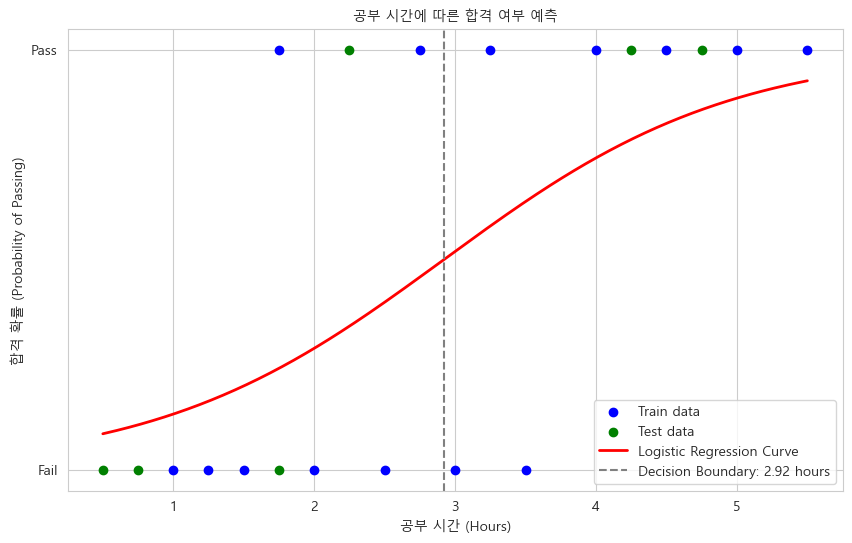

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.font_manager as fm

# 1. 가상 데이터 생성
# 공부 시간 (Hours Studied)
hours = np.array([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5]).reshape(-1, 1)
# 합격 여부 (Pass: 1, Fail: 0)
passed = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(hours, passed, test_size=0.3, random_state=42)

# 3. 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. 모델 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.2f}")

# 5. 그래프 분석 및 시각화
plt.figure(figsize=(10, 6))

# 원본 데이터 산점도
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')

# 로지스틱 회귀 곡선 그리기
x_range = np.linspace(hours.min(), hours.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1] # 1(합격)이 될 확률
plt.plot(x_range, y_prob, color='red', linewidth=2, label='Logistic Regression Curve')

# 결정 경계 (Decision Boundary) - 확률이 0.5가 되는 지점
decision_boundary = -model.intercept_ / model.coef_[0]
plt.axvline(x=decision_boundary, color='grey', linestyle='--', label=f'Decision Boundary: {decision_boundary[0]:.2f} hours')

# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.title('공부 시간에 따른 합격 여부 예측',fontproperties=font_prop)
plt.xlabel('공부 시간 (Hours)',fontproperties=font_prop)
plt.ylabel('합격 확률 (Probability of Passing)',fontproperties=font_prop)
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.legend()
plt.grid(True)
plt.show()